### Maven Roasters Sales Performance

In [16]:
# import Libraries

import pandas as pd
import plotly.express as px

In [17]:
# Load Data

df = pd.read_excel("C:/Users/DELL/Desktop/PYTHON CLASS/Coffee+Shop+Sales (4)/Coffee Shop Sales.xlsx", sheet_name = 'Transactions')

In [18]:
# Data Inspection 

print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [19]:
# Feature Enginerring

df['revenue'] = df['transaction_qty'] * df['unit_price']
df['day_of_week'] = df['transaction_date'].dt.day_name()

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Sunday


### Analysis and Visualization

In [20]:
# Daily Sales Trend
daily_sales = df.groupby('day_of_week')['revenue'].sum().reset_index()

daily_sales

,day_of_week,revenue
0,Friday,101373.00
1,Monday,101677.28
2,Saturday,96894.48
3,Sunday,98330.31
4,Thursday,100767.78
5,Tuesday,99455.94
6,Wednesday,100313.54


In [60]:
daily_sales = df.groupby('day_of_week')['revenue'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday',
                                                                    'Friday','Saturday','Sunday']).reset_index()


daily_sales

,day_of_week,revenue
0,Monday,101677.28
1,Tuesday,99455.94
2,Wednesday,100313.54
3,Thursday,100767.78
4,Friday,101373.00
5,Saturday,96894.48
6,Sunday,98330.31


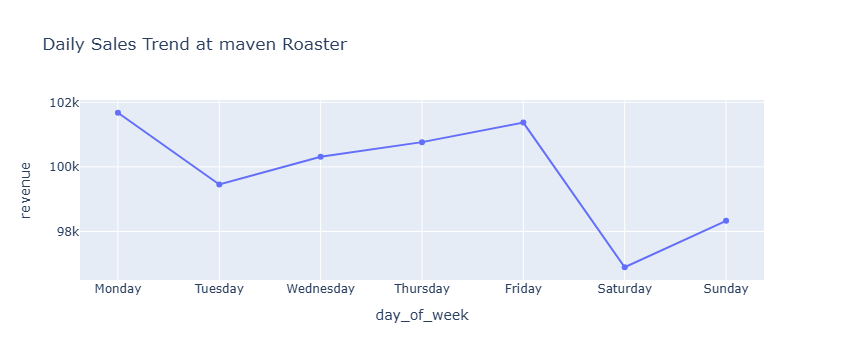

In [61]:
daily_sales = df.groupby('day_of_week')['revenue'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday',
                                                                    'Friday','Saturday','Sunday']).reset_index()


daily_sales

fig1 = px.line(daily_sales, x = 'day_of_week', y = 'revenue', title = 'Daily Sales Trend at maven Roaster', markers = True)
fig1.show()

In [55]:
df['revenue'] = df['transaction_qty'] * df['unit_price']
df['day_of_week'] = df['transaction_date'].dt.day_name()
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Sunday


In [62]:
# Quantity Sold by Day of the Week

weekly_sales = df.groupby('day_of_week')['transaction_qty'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday',
                                                                           'Friday','Saturday','Sunday']).reset_index()

weekly_sales

,day_of_week,transaction_qty
0,Monday,31231
1,Tuesday,30449
2,Wednesday,30625
3,Thursday,31162
4,Friday,31207
5,Saturday,29614
6,Sunday,30182


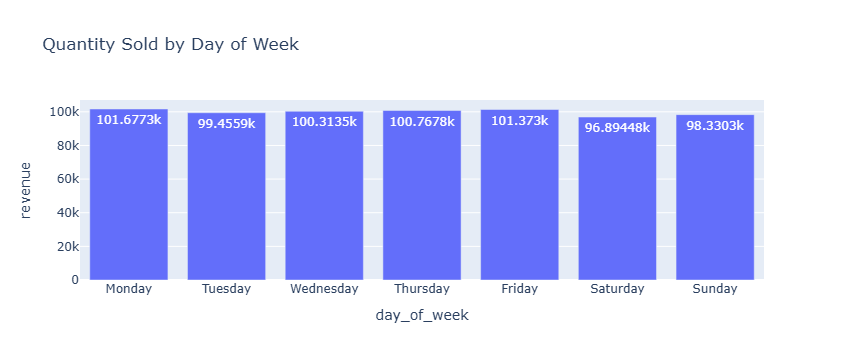

In [63]:
weekly_sales = df.groupby('day_of_week')['transaction_qty'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday',
                                                                           'Friday','Saturday','Sunday']).reset_index()
weekly_sales

fig1 = px.bar(daily_sales, x = 'day_of_week', y = 'revenue', title = 'Quantity Sold by Day of Week', text_auto = True)
fig1.show()


In [53]:
weekly_sales = df.groupby('day_of_week')['transaction_qty'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday',
                                                                           'Friday','Saturday','Sunday']).reset_index()
weekly_sales

,day_of_week,transaction_qty
0,Monday,31231
1,Tuesday,30449
2,Wednesday,30625
3,Thursday,31162
4,Friday,31207
5,Saturday,29614
6,Sunday,30182


In [38]:
# Most Quantity Sold Products

Product_sales = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending = False).reset_index().head(5)
Product_sales

,product_detail,transaction_qty
0,Earl Grey Rg,4708
1,Dark chocolate Lg,4668
2,Morning Sunrise Chai Rg,4643
3,Latte,4602
4,Peppermint Rg,4564


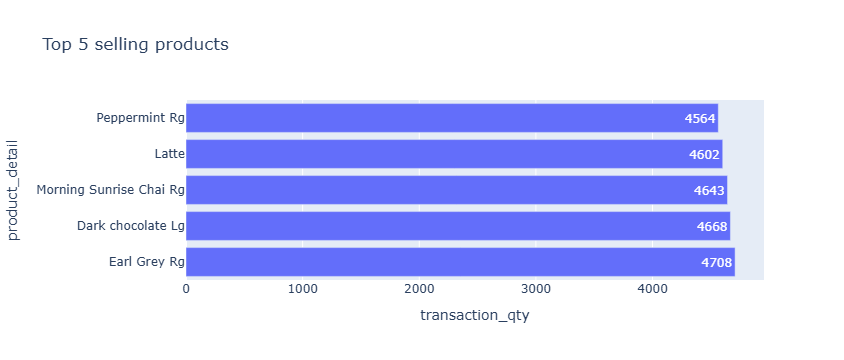

In [40]:
Product_sales = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending = False).reset_index().head(5)
Product_sales
fig3 = px.bar(Product_sales, x = 'transaction_qty', y = 'product_detail', orientation = 'h',
               title = 'Top 5 selling products', text_auto = True)
fig3 .show()

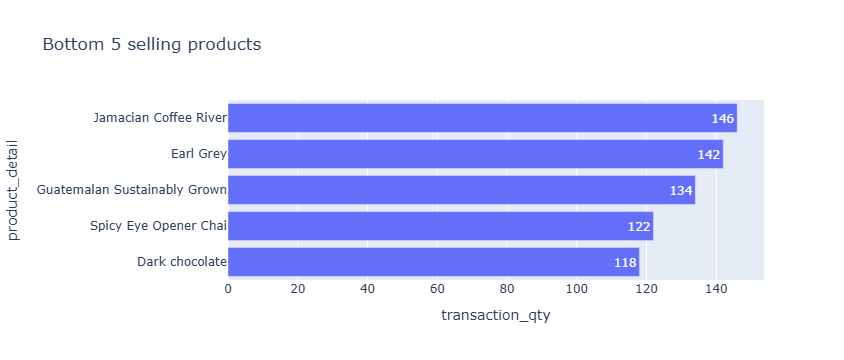

In [47]:
# Bottom 5 Selling Products

Product_sales = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending = True).reset_index().head(5)
Product_sales
fig4 = px.bar(Product_sales, x = 'transaction_qty', y = 'product_detail', orientation = 'h',
               title = 'Bottom 5 selling products', text_auto = True)
fig4.show()

In [46]:
# Products driving the most revenue
product_revenue = df.groupby('product_detail')['revenue'].sum().sort_values(ascending = False).reset_index()
product_revenue

,product_detail,revenue
0,Sustainably Grown Organic Lg,21151.75
1,Dark chocolate Lg,21006.00
2,Latte Rg,19112.25
3,Cappuccino Lg,17641.75
4,Morning Sunrise Chai Lg,17384.00
...,...,...
75,Lemon Grass,1360.40
76,Guatemalan Sustainably Grown,1340.00
77,Spicy Eye Opener Chai,1335.90
78,Earl Grey,1270.90


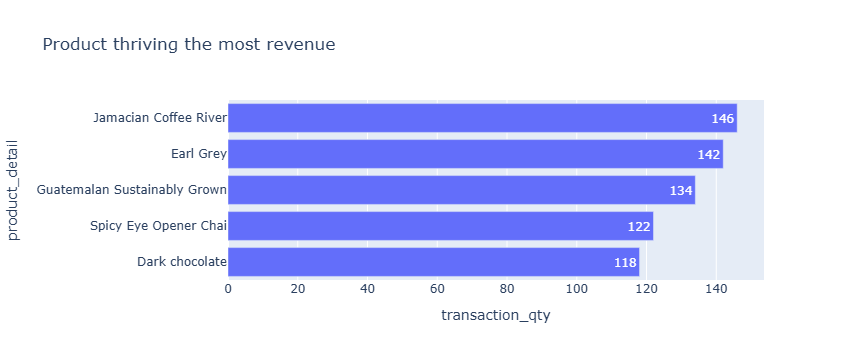

In [49]:
product_revenue = df.groupby('product_detail')['revenue'].sum().sort_values(ascending = False).reset_index().head(5)
product_revenue

fig5 = px.bar(Product_sales, x = 'transaction_qty', y = 'product_detail', orientation = 'h',
               title = 'Product thriving the most revenue', text_auto = True)
fig5.show()